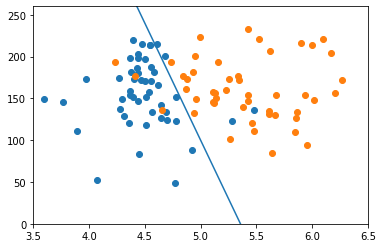

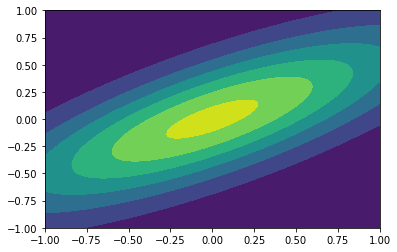

In [7]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import datasets

np.random.seed(0);

X,y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2);
X[:,0]=X[:,0]*0.5+5;
X[:,1]=X[:,1]*30+160;

fig,ax = plt.subplots();

ax.scatter(X[y==0,0],X[y==0,1]);
ax.scatter(X[y==1,0],X[y==1,1]);

x1 = np.linspace(3.5,6.5,100);
x2 = -280*x1 + 1500;

ax.plot(x1,x2);
plt.xlim(3.5,6.5);
plt.ylim(0, 260);

plt.show();

# def get_cov(sdx=1,sdy=1,rotangdeg=0):
#   covar = np.array([[sdx,0],[0,sdy]]);
#   rot_ang = (rotangdeg/360) *2*np.pi;
#   rot_mat = np.array([[np.cos(rotangdeg),-np.sin(rotangdeg)],[np.sin(rotangdeg),np.cos(rotangdeg)]]);
#   covar = np.matmul(np.matmul(rot_mat,covar),rot_mat.T)
#   return covar

def get_cov(sdx=1, sdy=1, rotangdeg=0):
  covar = np.array([[sdx, 0], [0, sdy]])
  rot_ang = rotangdeg / 360 * 2 * np.pi
  rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])
  
  covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
  return covar 

x1line = np.linspace(-1,1,200);
x2line = np.linspace(-1,1,200);

x1grid, x2grid = np.meshgrid(x1line,x2line);

Xgrid = np.array([x1grid,x2grid]).reshape([2,40000]).T

covar = get_cov(sdx=1,sdy=0.1,rotangdeg=30)

p = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar))) * np.exp(
    -1 / 2 * (np.matmul(Xgrid, np.linalg.inv(covar)) * Xgrid).sum(-1))

pgrid = np.reshape(p, [200, 200])

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, pgrid)

plt.show()